针对LCIS数据进行分析，包含了某投资人成交的所有标的数据。其中包括标的一些相关信息以及投资人的相关信息如投资金额、收款情况等。
我们首先要做的是尝试去理解数据，并结合业务知识对变量进行分类。

1.还款情况：与还款相关的变量  
2.贷款人基本属性：年龄、性别、学历等属性  
3.行为属性：手机认证、视频认证等信息  
4.借款信息：借款金额、还款期限以及借款利率等  
5.交易信息  


互联网金融的核心是风控，我们可以从数据中得到一些有关风险控制的分析。

逾期客户画像：得出未按时还款客户的整体画像，帮助企业降低坏账率，为放贷与否以及额度大小提供指导建议。（就是对逾期
客户进行分析，看看逾期客户大概具备什么样的特征。）另外，分析各维度的不良贷款率，以及放贷比例，可以为企业提供一些
有效的参考建议。

逾期用户画像：  
    1.用户基本信息分析  
    2.用户行为信息分析  
不良率分析：  
    1.随记录时间变化趋势  
    2.与年龄、性别的相关性  
    3.与初始评级的相关性  
    4.与借款信息的相关性  





# 1 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams['font.sans-serif'] = ['SimHei']
sns.set(style='darkgrid',font='SimHei')

In [2]:
data = pd.read_csv('D:\DataSet\ppdai_3_23\LCIS.csv',dtype={'ListingId':str})

In [3]:
data.head(5)

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,recorddate
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.00,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.00,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.00,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.00,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.5,2016/12/31


In [4]:
#查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292539 entries, 0 to 292538
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ListingId   292539 non-null  object 
 1   借款金额        292539 non-null  int64  
 2   借款期限        292539 non-null  int64  
 3   借款利率        292539 non-null  float64
 4   借款成功日期      292539 non-null  object 
 5   初始评级        292539 non-null  object 
 6   借款类型        292539 non-null  object 
 7   是否首标        292539 non-null  object 
 8   年龄          292539 non-null  int64  
 9   性别          292539 non-null  object 
 10  手机认证        292539 non-null  object 
 11  户口认证        292539 non-null  object 
 12  视频认证        292539 non-null  object 
 13  学历认证        292539 non-null  object 
 14  征信认证        292539 non-null  object 
 15  淘宝认证        292539 non-null  object 
 16  历史成功借款次数    291336 non-null  float64
 17  历史成功借款金额    291336 non-null  float64
 18  总待还本金       292539 non-null  float64
 19  历史

In [5]:
#对数据做一些描述性统计
data.describe()

,借款金额,借款期限,借款利率,年龄,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,我的投资金额,...,当前还款期数,已还本金,已还利息,待还本金,待还利息,标当前逾期天数,上次还款本金,上次还款利息,下次计划还款本金,下次计划还款利息
count,292539.000000,292539.000000,292539.000000,292539.000000,291336.000000,2.913360e+05,2.925390e+05,2.925390e+05,292539.000000,292539.000000,...,292539.000000,292539.000000,292539.000000,292539.000000,292539.000000,292539.000000,270290.000000,270290.000000,182563.000000,181494.000000
mean,8516.123713,10.191974,17.783796,29.353949,2.583769,1.513134e+04,4.499622e+03,7.664124e+01,18.366290,96.347625,...,5.653215,72.086067,4.796278,24.475503,1.669001,3.185104,21.278687,0.481281,6.042533,0.584434
std,27584.913864,3.148704,3.375216,6.165157,5.081881,7.026413e+04,1.698939e+04,4.672302e+03,1256.978087,117.748925,...,11.146470,122.297594,6.482616,30.993081,2.305682,27.908310,48.777880,0.421215,4.374562,0.331167
min,100.000000,1.000000,7.000000,18.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.000000,6.000000,16.000000,25.000000,1.000000,1.000000e+03,0.000000e+00,0.000000e+00,0.000000,50.000000,...,2.000000,12.000000,1.560000,0.000000,0.000000,0.000000,4.220000,0.150000,4.130000,0.370000
50%,4107.000000,12.000000,18.000000,28.000000,2.000000,6.500000e+03,2.883070e+03,7.000000e+00,0.000000,50.000000,...,5.000000,28.260000,2.660000,21.540000,0.750000,0.000000,6.730000,0.440000,4.430000,0.570000
75%,7000.000000,12.000000,20.000000,32.000000,4.000000,1.369200e+04,5.890600e+03,1.500000e+01,0.000000,58.000000,...,7.000000,50.000000,4.890000,41.980000,2.910000,0.000000,16.740000,0.700000,8.120000,0.760000
max,500000.000000,24.000000,24.000000,65.000000,487.000000,3.856476e+06,1.697706e+06,1.625000e+06,524034.000000,2190.000000,...,1100.000000,2190.000000,269.600000,1100.000000,87.740000,681.000000,1413.000000,11.770000,96.900000,8.920000


In [6]:
#可以将英文索引改为中文，方便在作图时统一格式
data.rename(columns={'ListingId':'列表序号','recorddate':'记录日期'},inplace=True)

In [7]:
data.head()

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.00,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.00,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.00,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.00,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.5,2016/12/31


# 2 数据预处理
主要是检查数据中是否存在缺失值、重复值、错误值、异常值等，并对这些数据进行分析与处理

## 2.1 缺失值的分析与处理

In [8]:
(data.isnull()).sum()

列表序号             0
借款金额             0
借款期限             0
借款利率             0
借款成功日期           0
初始评级             0
借款类型             0
是否首标             0
年龄               0
性别               0
手机认证             0
户口认证             0
视频认证             0
学历认证             0
征信认证             0
淘宝认证             0
历史成功借款次数      1203
历史成功借款金额      1203
总待还本金            0
历史正常还款期数         0
历史逾期还款期数         0
我的投资金额           0
当前到期期数           0
当前还款期数           0
已还本金             0
已还利息             0
待还本金             0
待还利息             0
标当前逾期天数          0
标当前状态            0
上次还款日期       21049
上次还款本金       22249
上次还款利息       22249
下次计划还款日期    109976
下次计划还款本金    109976
下次计划还款利息    111045
记录日期           409
dtype: int64

In [9]:
a = (data.isnull()).sum()
a[a>0]

历史成功借款次数      1203
历史成功借款金额      1203
上次还款日期       21049
上次还款本金       22249
上次还款利息       22249
下次计划还款日期    109976
下次计划还款本金    109976
下次计划还款利息    111045
记录日期           409
dtype: int64

In [10]:
#每一列的缺失率
data.apply(lambda x: sum(x.isnull())/len(x))

列表序号        0.000000
借款金额        0.000000
借款期限        0.000000
借款利率        0.000000
借款成功日期      0.000000
初始评级        0.000000
借款类型        0.000000
是否首标        0.000000
年龄          0.000000
性别          0.000000
手机认证        0.000000
户口认证        0.000000
视频认证        0.000000
学历认证        0.000000
征信认证        0.000000
淘宝认证        0.000000
历史成功借款次数    0.004112
历史成功借款金额    0.004112
总待还本金       0.000000
历史正常还款期数    0.000000
历史逾期还款期数    0.000000
我的投资金额      0.000000
当前到期期数      0.000000
当前还款期数      0.000000
已还本金        0.000000
已还利息        0.000000
待还本金        0.000000
待还利息        0.000000
标当前逾期天数     0.000000
标当前状态       0.000000
上次还款日期      0.071953
上次还款本金      0.076055
上次还款利息      0.076055
下次计划还款日期    0.375936
下次计划还款本金    0.375936
下次计划还款利息    0.379590
记录日期        0.001398
dtype: float64

In [11]:
#也可以用DataFrame的方式将缺失率表达出来
miss_rate = pd.DataFrame(data.apply(lambda x: sum(x.isnull())/len(x)))

miss_rate.columns = ['缺失率']
miss_rate

,缺失率
列表序号,0.000000
借款金额,0.000000
借款期限,0.000000
借款利率,0.000000
借款成功日期,0.000000
初始评级,0.000000
借款类型,0.000000
是否首标,0.000000
年龄,0.000000
性别,0.000000


In [12]:
#使用百分比的形式表示缺失率
miss_rate[miss_rate['缺失率']>0]['缺失率'].apply(lambda x:format(x,'.3%'))

历史成功借款次数     0.411%
历史成功借款金额     0.411%
上次还款日期       7.195%
上次还款本金       7.605%
上次还款利息       7.605%
下次计划还款日期    37.594%
下次计划还款本金    37.594%
下次计划还款利息    37.959%
记录日期         0.140%
Name: 缺失率, dtype: object

In [13]:
b = miss_rate[miss_rate['缺失率']>0]['缺失率'].apply(lambda x:format(x,'.3%'))
b = pd.DataFrame(b)
b

,缺失率
历史成功借款次数,0.411%
历史成功借款金额,0.411%
上次还款日期,7.195%
上次还款本金,7.605%
上次还款利息,7.605%
下次计划还款日期,37.594%
下次计划还款本金,37.594%
下次计划还款利息,37.959%
记录日期,0.140%


In [14]:
#将下次计划还款利息这一字段为空的数据提取出来
data[data['下次计划还款利息'].isnull()].head()

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
0,1693100,3629,6,12.0,2015/1/28,AA,普通,否,31,男,...,0.0,0,已还清,2015/7/28,34.20,0.30,NaN,NaN,NaN,2016/12/31
1,1713229,3000,12,12.0,2015/1/30,AA,普通,是,24,男,...,0.0,0,已还清,2015/10/19,173.39,1.05,NaN,NaN,NaN,2016/12/31
2,1904026,3629,12,12.0,2015/3/7,AA,普通,否,27,男,...,0.0,0,已还清,2016/3/6,44.04,0.38,NaN,NaN,NaN,2016/12/31
3,2158281,3919,12,18.0,2015/4/14,C,普通,否,28,男,...,0.0,0,已还清,2015/5/19,92.34,0.22,NaN,NaN,NaN,2016/12/31
5,2272036,40000,6,15.0,2015/4/29,B,电商,是,32,男,...,0.0,0,已还清,2015/10/27,35.43,0.42,NaN,NaN,NaN,2016/12/31


In [15]:
c = data[data['下次计划还款利息'].isnull()]['标当前状态'].head(10)
c = pd.DataFrame(c)
c

,标当前状态
0,已还清
1,已还清
2,已还清
3,已还清
5,已还清
6,已还清
7,已还清
8,已还清
9,已还清
10,已还清


In [16]:
#如果标当前状态属于已还清，那么下次还款日期、下次还款本金、下次还款利息为空是正常情况。
#如果标当前状态是正常还款中，那么下次还款日期、下次还款本金、下次还款利息为空是不正常的。

a = data[data['下次计划还款利息'].isnull()]['标当前状态'].value_counts()
a = pd.DataFrame(a)
a

,标当前状态
已还清,109168
正常还款中,674
0,409
5,26
3.56,26
...,...
4.52,1
0.99,1
2.62,1
2.17,1


In [17]:
#将上次还款日期为空值的数据项提取出来
data[data['上次还款日期'].isnull()].head()

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
4,2257194,14000,12,18.0,2015/4/23,C,普通,否,46,男,...,9.92,589,逾期中,NaN,NaN,NaN,2015/5/23,7.66,1.50,2016/12/31
133,26652472,6066,12,22.0,2016/12/4,C,普通,否,35,男,...,6.77,0,正常还款中,NaN,NaN,NaN,2017/1/4,4.13,1.01,2016/12/31
134,26753604,6000,6,20.0,2016/12/5,C,普通,否,28,男,...,3.42,0,正常还款中,NaN,NaN,NaN,2017/1/5,9.27,0.96,2016/12/31
135,26878075,7072,12,22.0,2016/12/6,C,普通,否,30,男,...,6.77,0,正常还款中,NaN,NaN,NaN,2017/1/6,4.13,1.01,2016/12/31
136,27024156,3874,12,18.0,2016/12/7,B,其他,否,23,男,...,3.20,0,正常还款中,NaN,NaN,NaN,2017/1/7,2.45,0.48,2016/12/31


In [18]:
pd.DataFrame(data['标当前状态'].value_counts())
# 这里可以看到标当前状态这个字段本身也存在填写错误的情况

,标当前状态
正常还款中,172569
已还清,109168
逾期中,9599
0,409
5,26
...,...
2.63,1
5.79,1
1.03,1
0.48,1


In [19]:
#接下来，对上次还款日期、上次还款本金、上次还款利息的缺失情况进行分析
#以上次还款日期为例，如果标当前状态为正常还款中，那上次还款情况为空就是不正常的
#如果标当前状态为逾期中，那么说明上次没有正常还款，所以上次还款情况空着是正常的。
a = data[data['上次还款日期'].isnull()]['标当前状态'].value_counts()
a = pd.DataFrame(a)
a 

,标当前状态
正常还款中,20103
逾期中,946


In [20]:
#上次还款利息的缺失情况
a = data[data['上次还款利息'].isnull()]['标当前状态'].value_counts()
a = pd.DataFrame(a)
a

,标当前状态
正常还款中,20103
逾期中,943
0,409
3.56,26
5,26
...,...
0.55,1
0.48,1
4.49,1
6.2,1


In [21]:
#对历史成功借款次数以及历史成功借款金额的缺失情况进行分析

data[data['历史成功借款金额'].isnull()].head(10)

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
118020,1625423,4140,3,12.0,2015/1/8,AA,普通,否,36,男,...,0.84,0,0,0,NaN,NaN,16.84,0.00,NaN,NaN
118021,1678223,4921,12,12.0,2015/1/23,AA,普通,否,27,女,...,9.68,0,0,0,NaN,NaN,13.07,0.07,NaN,NaN
118022,1710623,5728,12,12.0,2015/2/1,AA,普通,否,28,女,...,33.04,0,0,0,NaN,NaN,44.06,0.36,NaN,NaN
118023,1839423,120000,6,18.0,2015/2/12,B,电商,是,36,男,...,10.41,0,0.49,447,NaN,NaN,35.09,1.06,NaN,0
118024,1993823,3869,12,12.0,2015/3/23,AA,普通,否,29,男,...,20.99,0,0,0,NaN,NaN,298.93,0.00,NaN,NaN
118025,1994223,14053,12,18.0,2015/3/17,D,其他,否,51,男,...,9.92,0,0,0,NaN,NaN,9.1,0.06,NaN,NaN
118026,1999823,12425,12,22.0,2015/3/18,E,其他,否,38,男,...,6.45,0,0,0,NaN,NaN,69.08,0.00,NaN,NaN
118027,2052623,300000,6,15.0,2015/3/27,B,电商,是,32,男,...,8.71,0,0,0,NaN,NaN,35.43,0.03,NaN,NaN
118028,2205023,26000,12,20.0,2015/4/16,D,其他,否,36,男,...,11.12,0,0,0,NaN,NaN,9.16,0.10,NaN,NaN
118029,2355823,4119,3,10.0,2015/5/5,AA,普通,否,37,男,...,0.72,0,0,0,NaN,NaN,16.82,0.02,NaN,NaN


In [22]:
#对记录日期的缺失情况进行分析
data[data['记录日期'].isnull()].head()

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
118020,1625423,4140,3,12.0,2015/1/8,AA,普通,否,36,男,...,0.84,0,0,0,NaN,NaN,16.84,0.00,NaN,NaN
118021,1678223,4921,12,12.0,2015/1/23,AA,普通,否,27,女,...,9.68,0,0,0,NaN,NaN,13.07,0.07,NaN,NaN
118022,1710623,5728,12,12.0,2015/2/1,AA,普通,否,28,女,...,33.04,0,0,0,NaN,NaN,44.06,0.36,NaN,NaN
118024,1993823,3869,12,12.0,2015/3/23,AA,普通,否,29,男,...,20.99,0,0,0,NaN,NaN,298.93,0.00,NaN,NaN
118025,1994223,14053,12,18.0,2015/3/17,D,其他,否,51,男,...,9.92,0,0,0,NaN,NaN,9.1,0.06,NaN,NaN


In [23]:
#删除缺失记录日期的数据项
data.dropna(subset=['记录日期'],how='any',inplace =True)

In [24]:
(data['记录日期'].isnull()).sum()

0

## 2.2 重复值的处理

In [25]:
#重复值的处理
data[data.duplicated()]

,列表序号,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,记录日期
172327,1638462,12716,12,18.0,2015/1/8,C,其他,否,28,男,...,0.00,0,已还清,2015/8/19,23.71,0.09,NaN,NaN,NaN,2016/9/30
172328,1655662,3900,10,12.0,2015/1/19,AA,普通,否,26,男,...,0.00,0,已还清,2015/11/19,52.31,0.48,NaN,NaN,NaN,2016/9/30
172329,1730462,3000,12,12.0,2015/1/28,AA,普通,是,37,男,...,0.00,0,已还清,2016/1/11,39.63,0.35,NaN,NaN,NaN,2016/9/30
172330,1800062,3500,12,12.0,2015/2/15,AA,普通,否,32,女,...,0.00,0,已还清,2016/1/14,12.31,0.06,NaN,NaN,NaN,2016/9/30
172331,1919662,5048,12,12.0,2015/3/7,AA,普通,否,32,男,...,0.00,0,已还清,2015/8/6,264.86,0.00,NaN,NaN,NaN,2016/9/30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172428,20288462,5123,6,18.0,2016/9/19,B,APP闪电,否,32,女,...,2.65,0,正常还款中,NaN,NaN,NaN,2016/10/19,8.02,0.75,2016/9/30
172429,20427662,2337,6,18.0,2016/9/21,B,APP闪电,否,30,女,...,2.71,0,正常还款中,NaN,NaN,NaN,2016/10/21,8.18,0.77,2016/9/30
172430,20436062,2726,6,16.0,2016/9/21,A,APP闪电,否,23,男,...,2.35,0,正常还款中,NaN,NaN,NaN,2016/10/21,8.05,0.67,2016/9/30
172431,20480062,7000,12,18.0,2016/9/22,B,APP闪电,否,27,女,...,0.00,0,已还清,2016/9/24,50.00,0.07,NaN,NaN,NaN,2016/9/30


In [26]:
#删除重复值
data.drop_duplicates(inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292024 entries, 0 to 292538
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   列表序号      292024 non-null  object 
 1   借款金额      292024 non-null  int64  
 2   借款期限      292024 non-null  int64  
 3   借款利率      292024 non-null  float64
 4   借款成功日期    292024 non-null  object 
 5   初始评级      292024 non-null  object 
 6   借款类型      292024 non-null  object 
 7   是否首标      292024 non-null  object 
 8   年龄        292024 non-null  int64  
 9   性别        292024 non-null  object 
 10  手机认证      292024 non-null  object 
 11  户口认证      292024 non-null  object 
 12  视频认证      292024 non-null  object 
 13  学历认证      292024 non-null  object 
 14  征信认证      292024 non-null  object 
 15  淘宝认证      292024 non-null  object 
 16  历史成功借款次数  291230 non-null  float64
 17  历史成功借款金额  291230 non-null  float64
 18  总待还本金     292024 non-null  float64
 19  历史正常还款期数  292024 non-null  int64  
 20  历史逾期

## 2.3 错误值的处理
这个重点检查一些文本型、类别型的字段存不存在填写错误的情况

In [28]:
# 手机认证
data['手机认证'].value_counts()

成功认证     153395
未成功认证    137835
未婚          415
已婚          349
其他           30
Name: 手机认证, dtype: int64

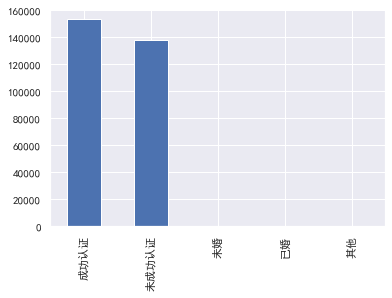

In [29]:
#也可以采用可视化的方式来表达，更加容易理解
data['手机认证'].value_counts().plot(kind='bar')

In [30]:
#户口认证
data['户口认证'].value_counts()

未成功认证     269709
成功认证       21521
大专           343
本科           264
高中            97
中专            42
研究生或以上        19
未填            16
初中及以下         13
Name: 户口认证, dtype: int64

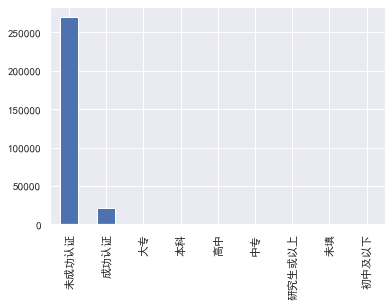

In [31]:
data['户口认证'].value_counts().plot(kind='bar')

In [32]:
# 视频认证
data['视频认证'].value_counts()

未成功认证    266817
成功认证      25207
Name: 视频认证, dtype: int64

In [33]:
# 学历认证
data['学历认证'].value_counts()

成功认证     148175
未成功认证    143849
Name: 学历认证, dtype: int64

In [34]:
# 征信认证
data['征信认证'].value_counts()

未成功认证    281524
成功认证      10500
Name: 征信认证, dtype: int64

In [35]:
# 淘宝认证
data['淘宝认证'].value_counts()

未成功认证    289927
成功认证       2097
Name: 淘宝认证, dtype: int64

In [36]:
# 标当前状态
data['标当前状态'].value_counts()

正常还款中    172505
已还清      109129
逾期中        9596
3.56         26
5            26
          ...  
2.63          1
5.79          1
1.03          1
0.48          1
5.1           1
Name: 标当前状态, Length: 233, dtype: int64

In [37]:
#经检查后，存在填写错误的字段有手机认证、户口认证、标当前状态
#显示成功认证和未成功认证的属于正常的数据
data = data[(data['手机认证']=='成功认证') | (data['手机认证']=='未成功认证')]
data = data[(data['户口认证']=='成功认证') | (data['户口认证']=='未成功认证')]
data = data[(data['标当前状态']=='正常还款中') | (data['标当前状态']=='已还清') | (data['标当前状态']=='逾期中')]

In [38]:
data['手机认证'].value_counts()

成功认证     153395
未成功认证    137835
Name: 手机认证, dtype: int64

In [39]:
data['户口认证'].value_counts()

未成功认证    269709
成功认证      21521
Name: 户口认证, dtype: int64

In [40]:
data['标当前状态'].value_counts()

正常还款中    172505
已还清      109129
逾期中        9596
Name: 标当前状态, dtype: int64

In [41]:

a = data[data['上次还款利息'].isnull()]['标当前状态'].value_counts()
a = pd.DataFrame(a)
a

,标当前状态
正常还款中,20095
逾期中,942


# 3 放贷比例与逾期情况分析

## 3.1 不同性别用户的放贷比例和逾期情况分析

In [42]:
#在这里我们使用数据透视表
#数据透视表是一种可以对数据进行动态排布并且分类汇总的表格
df_gender = pd.pivot_table(data=data,columns='标当前状态',index='性别',
                    values='列表序号',aggfunc=np.size)

In [43]:
df_gender

标当前状态,已还清,正常还款中,逾期中
性别,,,
女,29881,68967,2857
男,79248,103538,6739


In [44]:
df_gender['借款笔数占比'] = df_gender.apply(np.sum,axis=1)/df_gender.sum().sum()

In [45]:
df_gender['逾期笔数占比'] = df_gender['逾期中']/df_gender.apply(np.sum,axis=1)

In [46]:
df_gender

标当前状态,已还清,正常还款中,逾期中,借款笔数占比,逾期笔数占比
性别,,,,,
女,29881,68967,2857,0.349226,0.028091
男,79248,103538,6739,0.650774,0.035557


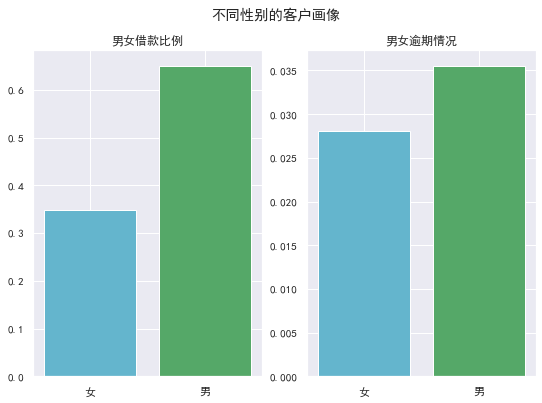

In [47]:
plt.figure(figsize=(9,6))

plt.subplot(121)
plt.bar(x=df_gender.index, height=df_gender['借款笔数占比'],color=['c','g'])
plt.title('男女借款比例')

plt.subplot(122)
plt.bar(x=df_gender.index, height=df_gender['逾期笔数占比'],color=['c','g'])
plt.title('男女逾期情况')

plt.suptitle('不同性别的客户画像')
plt.show()

## 3.2 不同年龄的用户的借款笔数以及逾期情况分析

In [48]:
#首先，要对年龄进行分段
data['age_bin'] = pd.cut(data['年龄'],[17,24,30,36,42,48,54,65],right=True)

In [49]:
data['age_bin']

0         (30, 36]
1         (17, 24]
2         (24, 30]
3         (24, 30]
4         (42, 48]
            ...   
292534    (42, 48]
292535    (24, 30]
292536    (24, 30]
292537    (48, 54]
292538    (17, 24]
Name: age_bin, Length: 291230, dtype: category
Categories (7, interval[int64]): [(17, 24] < (24, 30] < (30, 36] < (36, 42] < (42, 48] < (48, 54] < (54, 65]]

In [50]:
df_age = pd.pivot_table(data=data,columns='标当前状态',index='age_bin',
                        values='列表序号',aggfunc=np.size)

In [51]:
df_age

标当前状态,已还清,正常还款中,逾期中
age_bin,,,
"(17, 24]",21687,38187,2092
"(24, 30]",47594,79216,4023
"(30, 36]",24645,35916,2068
"(36, 42]",9267,11950,881
"(42, 48]",4631,5673,427
"(48, 54]",1225,1467,94
"(54, 65]",80,96,11


In [52]:
df_age['借款笔数'] = df_age.sum(axis=1)
df_age['借款笔数']

age_bin
(17, 24]     61966
(24, 30]    130833
(30, 36]     62629
(36, 42]     22098
(42, 48]     10731
(48, 54]      2786
(54, 65]       187
Name: 借款笔数, dtype: int64

In [53]:
df_age

标当前状态,已还清,正常还款中,逾期中,借款笔数
age_bin,,,,
"(17, 24]",21687,38187,2092,61966
"(24, 30]",47594,79216,4023,130833
"(30, 36]",24645,35916,2068,62629
"(36, 42]",9267,11950,881,22098
"(42, 48]",4631,5673,427,10731
"(48, 54]",1225,1467,94,2786
"(54, 65]",80,96,11,187


In [54]:
df_age['借款笔数分布'] = df_age['借款笔数']/ df_age['借款笔数'].sum()

In [55]:
df_age

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数分布
age_bin,,,,,
"(17, 24]",21687,38187,2092,61966,0.212773
"(24, 30]",47594,79216,4023,130833,0.449243
"(30, 36]",24645,35916,2068,62629,0.215050
"(36, 42]",9267,11950,881,22098,0.075878
"(42, 48]",4631,5673,427,10731,0.036847
"(48, 54]",1225,1467,94,2786,0.009566
"(54, 65]",80,96,11,187,0.000642


In [56]:
df_age['逾期笔数占比'] = df_age['逾期中'] / df_age['借款笔数']
df_age

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数分布,逾期笔数占比
age_bin,,,,,,
"(17, 24]",21687,38187,2092,61966,0.212773,0.033760
"(24, 30]",47594,79216,4023,130833,0.449243,0.030749
"(30, 36]",24645,35916,2068,62629,0.215050,0.033020
"(36, 42]",9267,11950,881,22098,0.075878,0.039868
"(42, 48]",4631,5673,427,10731,0.036847,0.039791
"(48, 54]",1225,1467,94,2786,0.009566,0.033740
"(54, 65]",80,96,11,187,0.000642,0.058824


In [57]:
df_age['借款笔数分布%'] = df_age['借款笔数分布'].apply(lambda x : format(x,'.3%'))
df_age['逾期笔数占比%'] = df_age['逾期笔数占比'].apply(lambda x : format(x,'.3%'))

In [58]:
df_age

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数分布,逾期笔数占比,借款笔数分布%,逾期笔数占比%
age_bin,,,,,,,,
"(17, 24]",21687,38187,2092,61966,0.212773,0.033760,21.277%,3.376%
"(24, 30]",47594,79216,4023,130833,0.449243,0.030749,44.924%,3.075%
"(30, 36]",24645,35916,2068,62629,0.215050,0.033020,21.505%,3.302%
"(36, 42]",9267,11950,881,22098,0.075878,0.039868,7.588%,3.987%
"(42, 48]",4631,5673,427,10731,0.036847,0.039791,3.685%,3.979%
"(48, 54]",1225,1467,94,2786,0.009566,0.033740,0.957%,3.374%
"(54, 65]",80,96,11,187,0.000642,0.058824,0.064%,5.882%


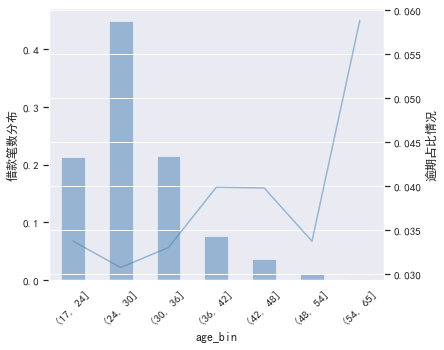

In [59]:
plt.figure(figsize=(6,5))
df_age['借款笔数分布'].plot(kind='bar',rot=45,color='steelblue',alpha=0.5)
plt.xlabel('年龄分段')
plt.ylabel('借款笔数分布')
df_age['逾期笔数占比'].plot(rot=45,color='steelblue',alpha=0.5,secondary_y=True)
plt.ylabel('逾期占比情况')
plt.grid(True)
plt.show()


## 3.3 不同学历的用户的借款笔数以及逾期情况分析

In [60]:
data['学历认证'].value_counts()

成功认证     148126
未成功认证    143104
Name: 学历认证, dtype: int64

In [61]:
#建立数据透视表
df_edu = pd.pivot_table(data=data,columns='标当前状态',index='学历认证',
                       values='列表序号',aggfunc=np.size)

In [62]:
df_edu

标当前状态,已还清,正常还款中,逾期中
学历认证,,,
成功认证,41431,102676,4019
未成功认证,67698,69829,5577


In [63]:
df_edu['借款笔数'] = df_edu.sum(axis=1)

In [64]:
df_edu['借款笔数占比'] = df_edu['借款笔数']/df_edu['借款笔数'].sum()

In [65]:
df_edu

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比
学历认证,,,,,
成功认证,41431,102676,4019,148126,0.508622
未成功认证,67698,69829,5577,143104,0.491378


In [66]:
df_edu['逾期占比'] = df_edu['逾期中']/df_edu['借款笔数']

In [67]:
df_edu

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期占比
学历认证,,,,,,
成功认证,41431,102676,4019,148126,0.508622,0.027132
未成功认证,67698,69829,5577,143104,0.491378,0.038972


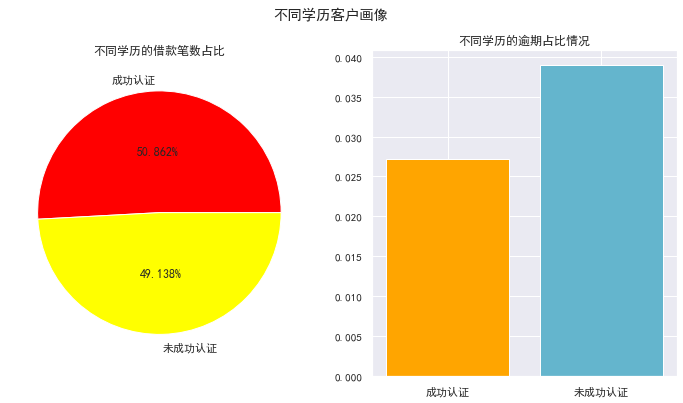

In [68]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.pie(x=df_edu['借款笔数占比'],labels=['成功认证','未成功认证'],
       colors=['red','yellow'],autopct='%.3f%%',
       pctdistance=0.5,labeldistance=1.1)
plt.title('不同学历的借款笔数占比')

plt.subplot(122)
plt.bar(x=df_edu.index,height=df_edu['逾期占比'],color=['orange','c'])
plt.title('不同学历的逾期占比情况')

plt.suptitle('不同学历客户画像')
plt.show()

## 3.4 借款笔数与逾期情况分析的快捷实现

In [69]:
def trans(data,col,ind):
    df = pd.pivot_table(data=data,columns=col,index=ind,
                       values='列表序号',aggfunc=np.size)
    df['借款笔数'] = df.apply(np.sum,axis=1)
    df['借款笔数占比'] = df['借款笔数']/df['借款笔数'].sum()
    df['逾期比例'] = df['逾期中']/df['借款笔数']
    
    plt.figure(figsize=(12,6))

    plt.subplot(121)
    plt.pie(x=df['借款笔数占比'],labels=['成功认证','未成功认证'],
           colors=['red','yellow'],autopct='%.3f%%',
           pctdistance=0.5,labeldistance=1.1)
    plt.title('不同%s的借款笔数占比' %ind)

    plt.subplot(122)
    plt.bar(x=df.index,height=df['逾期比例'],color=['orange','c'])
    plt.title('不同%s的逾期占比情况' %ind)

    plt.suptitle('%s客户画像' %ind)
    plt.show()
    return df

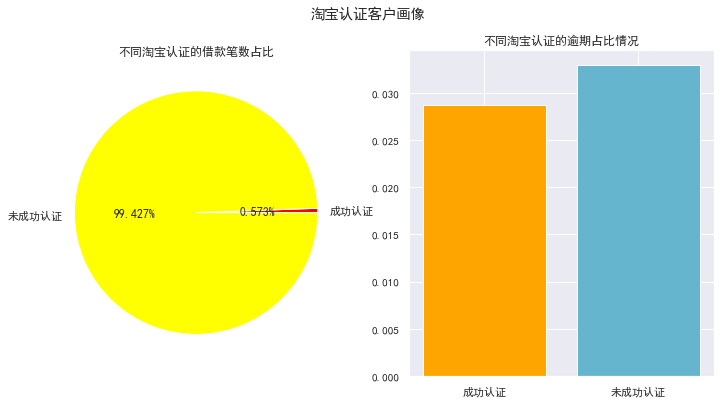

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期比例
淘宝认证,,,,,,
成功认证,1073,549,48,1670,0.005734,0.028743
未成功认证,108056,171956,9548,289560,0.994266,0.032974


In [70]:
trans(data,'标当前状态','淘宝认证')

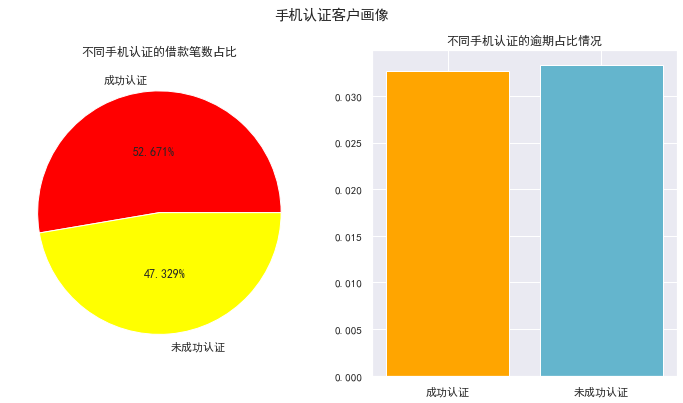

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期比例
手机认证,,,,,,
成功认证,73931,74458,5006,153395,0.526714,0.032635
未成功认证,35198,98047,4590,137835,0.473286,0.033301


In [71]:
trans(data,'标当前状态','手机认证')

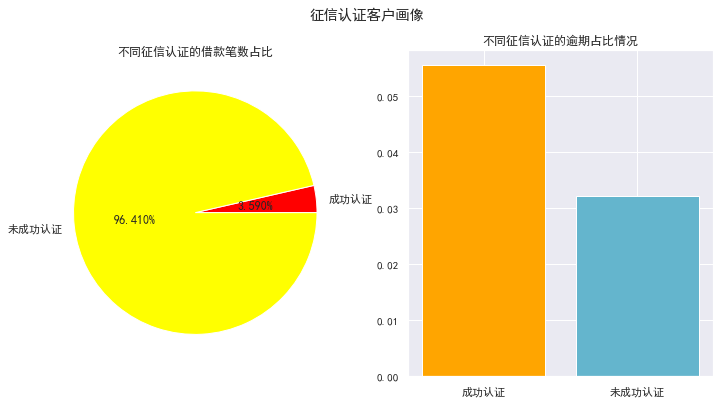

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期比例
征信认证,,,,,,
成功认证,4093,5782,580,10455,0.035899,0.055476
未成功认证,105036,166723,9016,280775,0.964101,0.032111


In [72]:
trans(data,'标当前状态','征信认证')

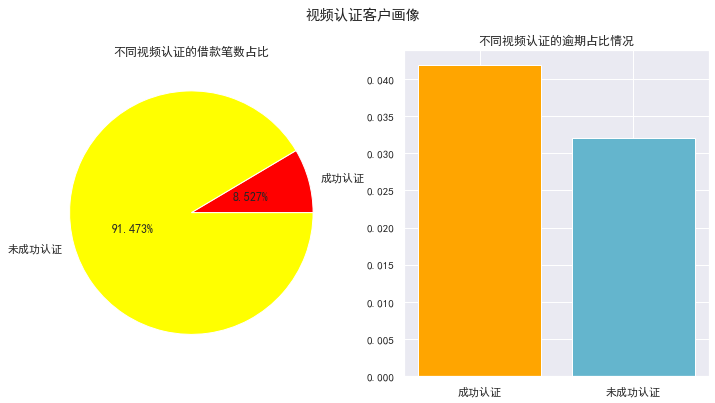

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期比例
视频认证,,,,,,
成功认证,15490,8302,1041,24833,0.085269,0.041920
未成功认证,93639,164203,8555,266397,0.914731,0.032114


In [73]:
trans(data,'标当前状态','视频认证')

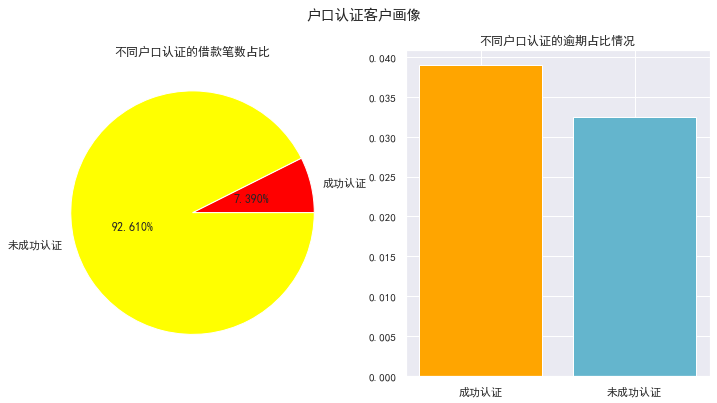

标当前状态,已还清,正常还款中,逾期中,借款笔数,借款笔数占比,逾期比例
户口认证,,,,,,
成功认证,14321,6361,839,21521,0.073897,0.038985
未成功认证,94808,166144,8757,269709,0.926103,0.032468


In [74]:
trans(data,'标当前状态','户口认证')

# 4 借款金额分析
以不同年龄的用户为例

In [75]:
df_age = data.groupby(['年龄'])['借款金额'].sum()
df_age = pd.DataFrame(df_age)

In [76]:
df_age['借款金额累计'] = df_age['借款金额'].cumsum()

In [77]:
df_age

,借款金额,借款金额累计
年龄,,
18,674385,674385
19,3661457,4335842
20,7744701,12080543
21,18611341,30691884
22,52258221,82950105
23,98477249,181427354
24,113366470,294793824
25,133387266,428181090
26,175863100,604044190


In [78]:

df_age['借款金额累计占比'] = df_age['借款金额累计'] / df_age['借款金额'].sum()

In [79]:
df_age

,借款金额,借款金额累计,借款金额累计占比
年龄,,,
18,674385,674385,0.000272
19,3661457,4335842,0.001748
20,7744701,12080543,0.004871
21,18611341,30691884,0.012376
22,52258221,82950105,0.033448
23,98477249,181427354,0.073157
24,113366470,294793824,0.118870
25,133387266,428181090,0.172656
26,175863100,604044190,0.243569


In [80]:
index_num = df_age[df_age['借款金额累计占比']>0.8].index

# 36岁以下的人员的贷款金额占总贷款金额的80%
index_num[0]

36

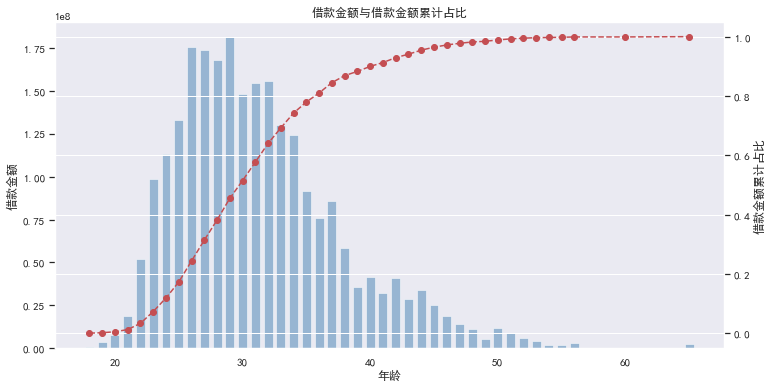

In [81]:
plt.figure(figsize=(12,6))

plt.bar(x=df_age.index,height=df_age['借款金额'],color='steelblue',alpha=0.5,width=0.7)
plt.xlabel('年龄')
plt.ylabel('借款金额')
#plt.twinx()
#plt.plot(df_age.index,df_age['借款金额累计占比'], 'bo--')

df_age['借款金额累计占比'].plot(style = '--or',secondary_y=True)
plt.ylabel('借款金额累计占比')

plt.title('借款金额与借款金额累计占比')
plt.show()